# Name: Ahmed Mohiuddin Shah
# CMS ID: 415216
# Section: BSCS-12-A
# Assignment: 1
# Subject: Machine Learning
# Submitted to: Dr. Muhammad Moazam Fraz

# Data Exploration and Preprocessing

## Importing Libraries

In [221]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Exploring Data

In [222]:
patient_dropout_data = pd.read_csv('data_patient_dropout.csv')
patient_dropout_data.head()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


- We can see that the data set has two columns each having 9 missing values

In [223]:
patient_dropout_data.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                9
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          9
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

- And upon seeing the shap of this data we can see we have 4284 rows of data so dropping, the rows with missing value will at max drop 18 rows which will not noticibly effect our dataset
- In this case 13 rows will be dropped
- We could have used mean imputation but that would not hav a significant impact in this case

In [224]:
patient_dropout_data.shape

(4284, 13)

## Visualizing Data and seeing distribution and imbalance

### Correlation Matrix

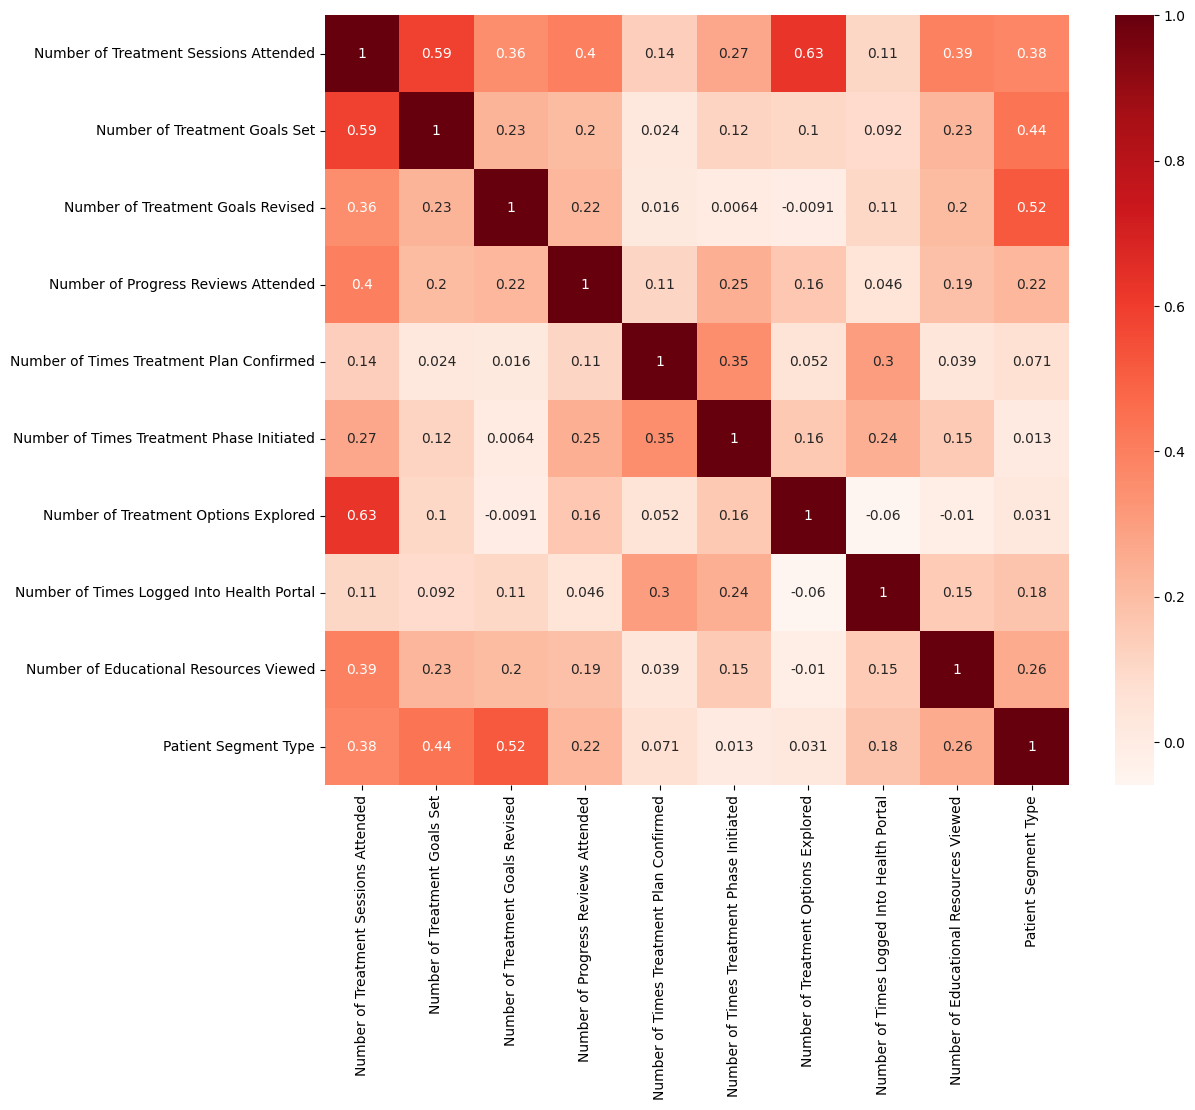

In [225]:
# correlation matrix
# get only numerical columns
patient_dropout_data_numerical = patient_dropout_data.select_dtypes(include=[np.number])
# exclude Treatment Dropped column
corr_data = patient_dropout_data_numerical.drop('Treatment Dropped', axis=1)
corr = corr_data.corr()
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Bar Plot

<Axes: xlabel='Treatment Dropped'>

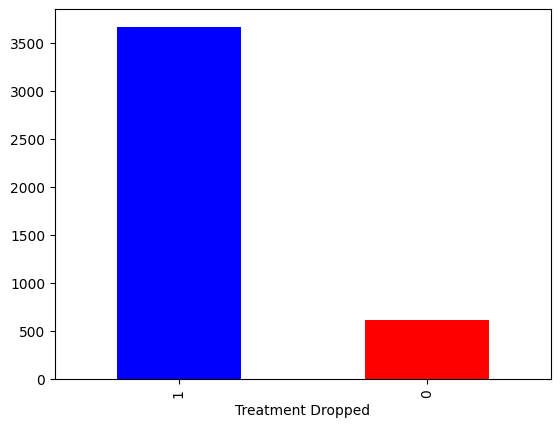

In [226]:
# Bar Plot
patient_dropout_data['Treatment Dropped'].value_counts().plot(kind='bar', color=['blue', 'red'])

## Preprocessing Data

### Dropping rows with missing data
- we also drop the patient id column as it is not needed

In [227]:
patient_dropout_data.dropna(inplace=True)
print(patient_dropout_data.shape)
patient_dropout_data.isnull().sum()

(4271, 13)


Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                0
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          0
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

In [228]:
# drop the patient ID column
patient_dropout_data.drop('Patient ID', axis=1, inplace=True)

### Feature Scaling

In [229]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
patient_dropout_data_scaled = patient_dropout_data.copy()
patient_dropout_data_scaled[['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set', 'Number of Treatment Goals Revised', 'Number of Progress Reviews Attended', 'Number of Times Treatment Plan Confirmed', 'Number of Times Treatment Phase Initiated', 'Number of Treatment Options Explored', 'Number of Times Logged Into Health Portal', 'Number of Educational Resources Viewed']] = scaler.fit_transform(patient_dropout_data[['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set', 'Number of Treatment Goals Revised', 'Number of Progress Reviews Attended', 'Number of Times Treatment Plan Confirmed', 'Number of Times Treatment Phase Initiated', 'Number of Treatment Options Explored', 'Number of Times Logged Into Health Portal', 'Number of Educational Resources Viewed']])
patient_dropout_data_scaled.head()

,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,Yes,-0.619532,-0.366274,-0.281821,-0.693479,-0.361933,-0.860453,-0.213745,-0.422817,-0.818392,0,1
1,No,1.512434,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,-0.048693,-0.422817,-0.121551,0,1
2,No,-0.368712,0.222716,-0.281821,-0.693479,1.567924,0.018522,-0.213745,-0.422817,-0.818392,1,0
3,No,-0.494122,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,0.281412,-0.422817,-0.818392,0,1
4,Yes,1.073500,1.547944,3.628271,-0.213127,-0.361933,-0.860453,0.281412,-0.422817,-0.818392,2,1


### Encoding Categorical Variables

In [230]:
# one hot encoding
patient_dropout_data_encoded = pd.get_dummies(
    patient_dropout_data_scaled,
    columns=["Initial Consultation Attended", "Patient Segment Type"],
)
patient_dropout_data_encoded.head()

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes,Patient Segment Type_0,Patient Segment Type_1,Patient Segment Type_2
0,-0.619532,-0.366274,-0.281821,-0.693479,-0.361933,-0.860453,-0.213745,-0.422817,-0.818392,1,False,True,True,False,False
1,1.512434,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,-0.048693,-0.422817,-0.121551,1,True,False,True,False,False
2,-0.368712,0.222716,-0.281821,-0.693479,1.567924,0.018522,-0.213745,-0.422817,-0.818392,0,True,False,False,True,False
3,-0.494122,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,0.281412,-0.422817,-0.818392,1,True,False,True,False,False
4,1.073500,1.547944,3.628271,-0.213127,-0.361933,-0.860453,0.281412,-0.422817,-0.818392,1,False,True,False,False,True


### Outlier Detection

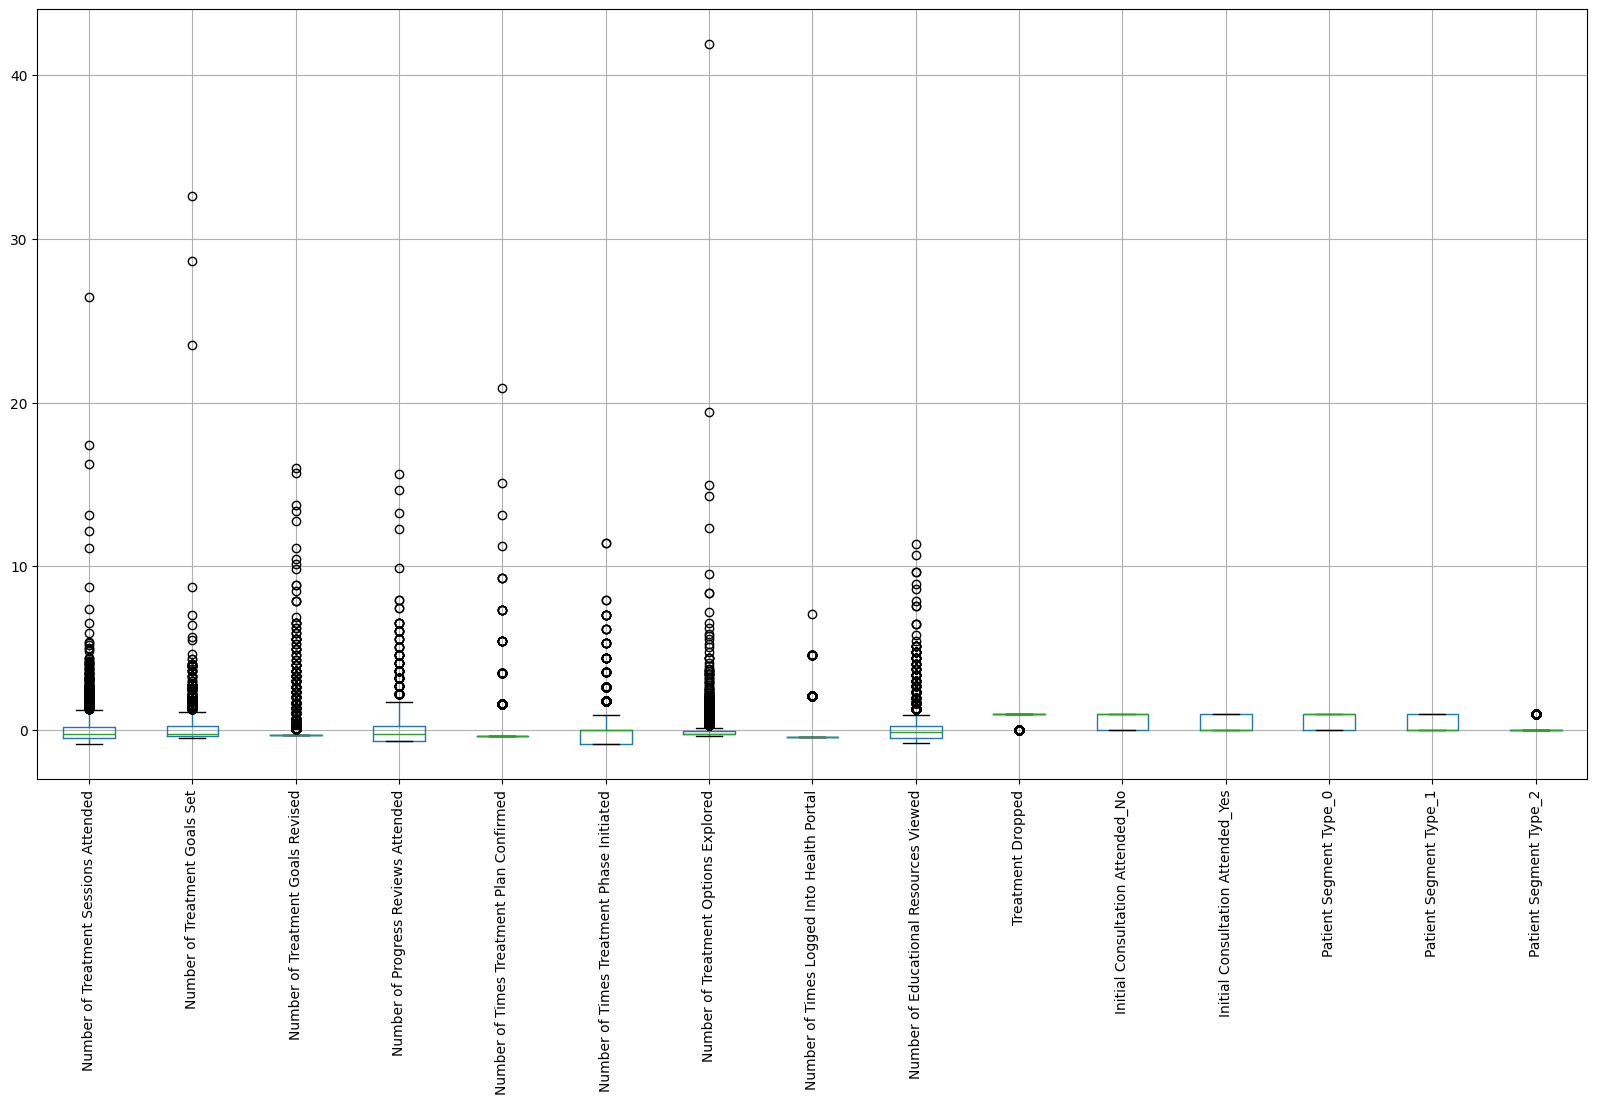

(3871, 15)

In [231]:
# detecting outliers using individual box plots
plt.figure(figsize=(20, 10))
patient_dropout_data_encoded.boxplot(rot=90)
plt.show()

# plot z-scores
from scipy import stats
# Ensure all columns are numeric
patient_dropout_data_encoded_numeric = patient_dropout_data_encoded.select_dtypes(include=[np.number])
z_scores = stats.zscore(patient_dropout_data_encoded_numeric)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
patient_dropout_data_removed_outliers = patient_dropout_data_encoded[filtered_entries]
patient_dropout_data_removed_outliers.shape

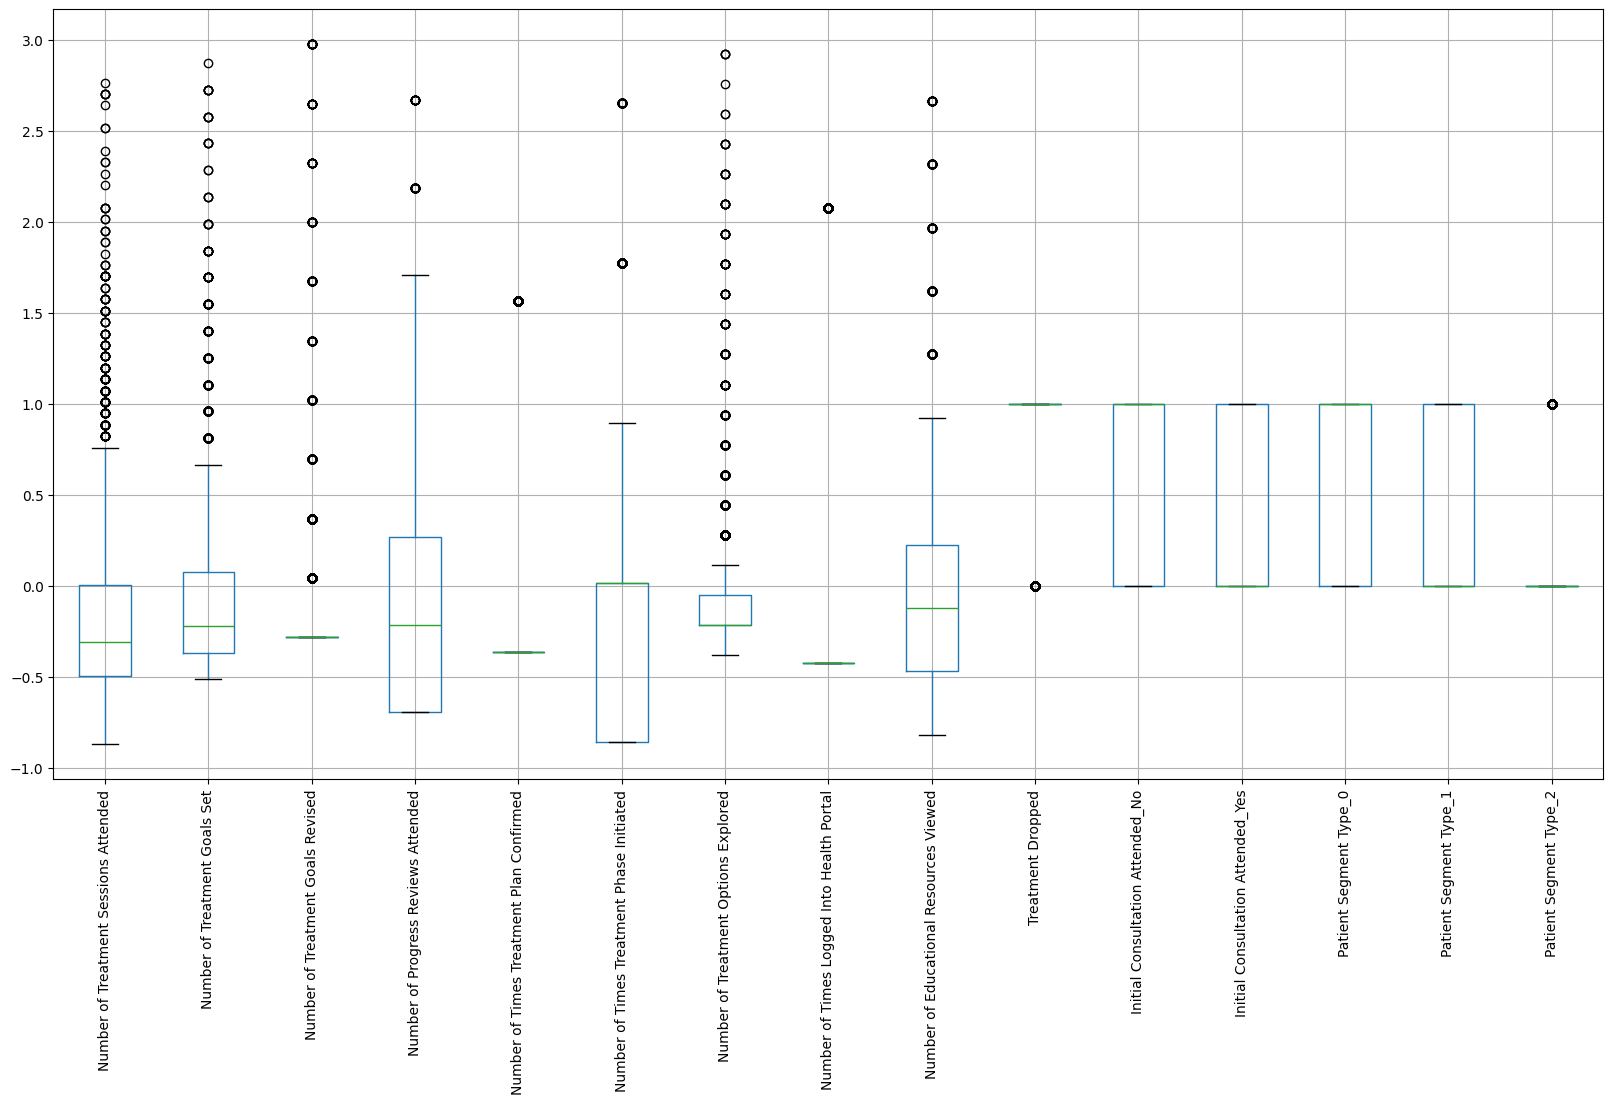

(3871, 15)

In [232]:
# new plot
plt.figure(figsize=(20, 10))
patient_dropout_data_removed_outliers.boxplot(rot=90)
plt.show()

patient_dropout_data_removed_outliers.shape


### Correlation Matrix

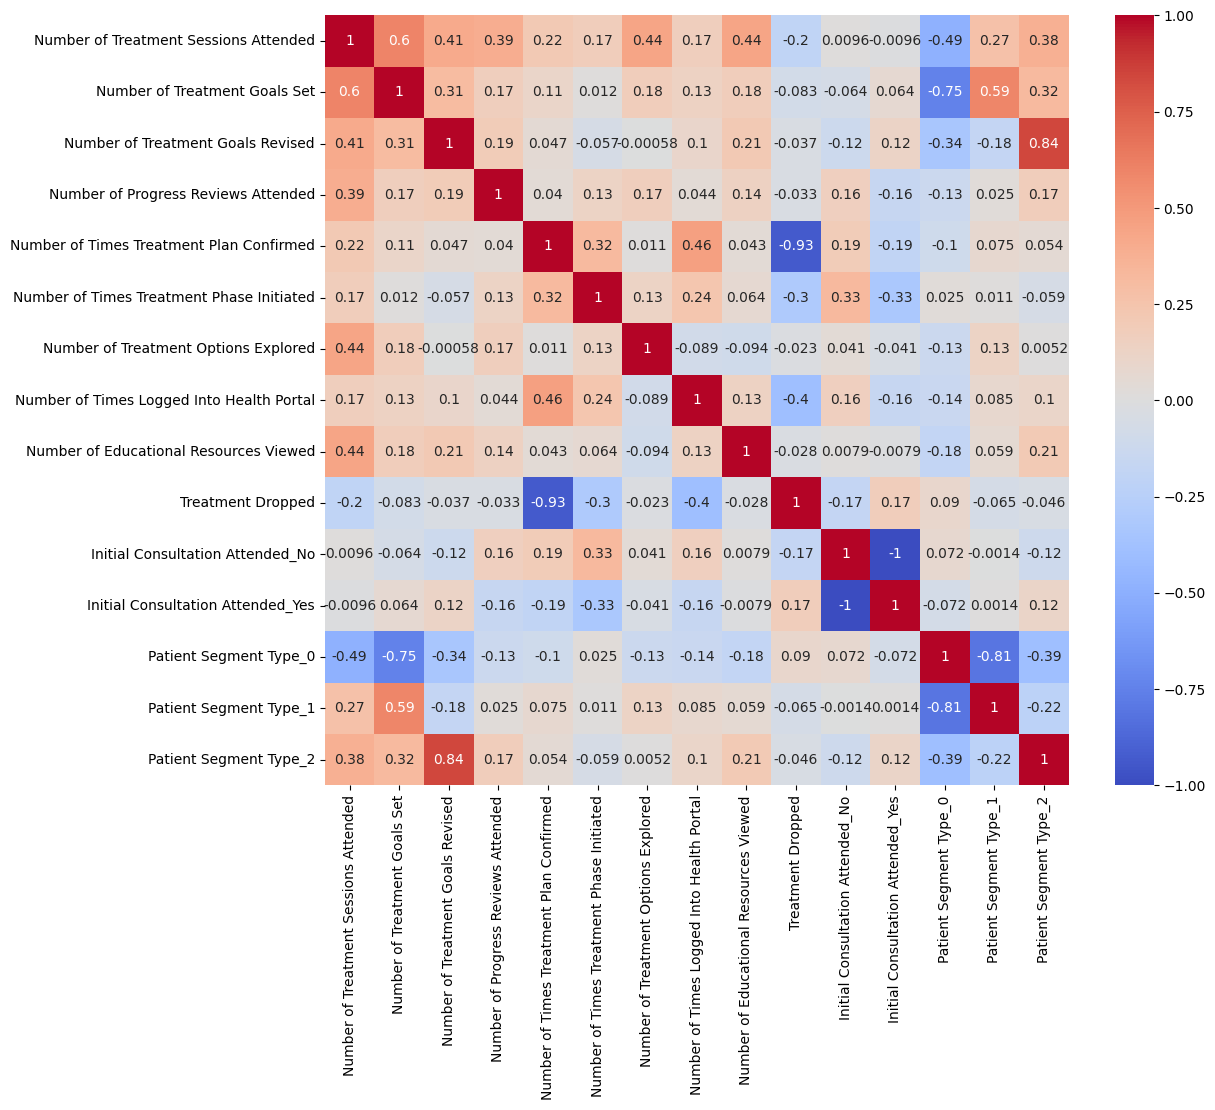

In [233]:
# Correlation matrix
corr = patient_dropout_data_removed_outliers.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Feature Engineering

## Interaction Feature
- by seeing the correlation matrix we can combine 
    - Number of Times Treatment Phase Initiated
    - Number of Times Logged Into Health Portal

In [234]:
# new interaction feature
patient_dropout_data_new_feature = patient_dropout_data_removed_outliers.copy()
patient_dropout_data_new_feature['Interaction Feature'] = patient_dropout_data_removed_outliers['Number of Times Treatment Phase Initiated'] * patient_dropout_data_removed_outliers['Initial Consultation Attended_Yes']
patient_dropout_data_new_feature.head()

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes,Patient Segment Type_0,Patient Segment Type_1,Patient Segment Type_2,Interaction Feature
0,-0.619532,-0.366274,-0.281821,-0.693479,-0.361933,-0.860453,-0.213745,-0.422817,-0.818392,1,False,True,True,False,False,-0.860453
1,1.512434,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,-0.048693,-0.422817,-0.121551,1,True,False,True,False,False,-0.000000
2,-0.368712,0.222716,-0.281821,-0.693479,1.567924,0.018522,-0.213745,-0.422817,-0.818392,0,True,False,False,True,False,0.000000
3,-0.494122,-0.513522,-0.281821,0.267224,-0.361933,-0.860453,0.281412,-0.422817,-0.818392,1,True,False,True,False,False,-0.000000
5,-0.055188,0.369963,-0.281821,-0.693479,-0.361933,0.018522,-0.213745,-0.422817,0.923709,1,False,True,False,True,False,0.018522


### Correlation Matrix with New Feature

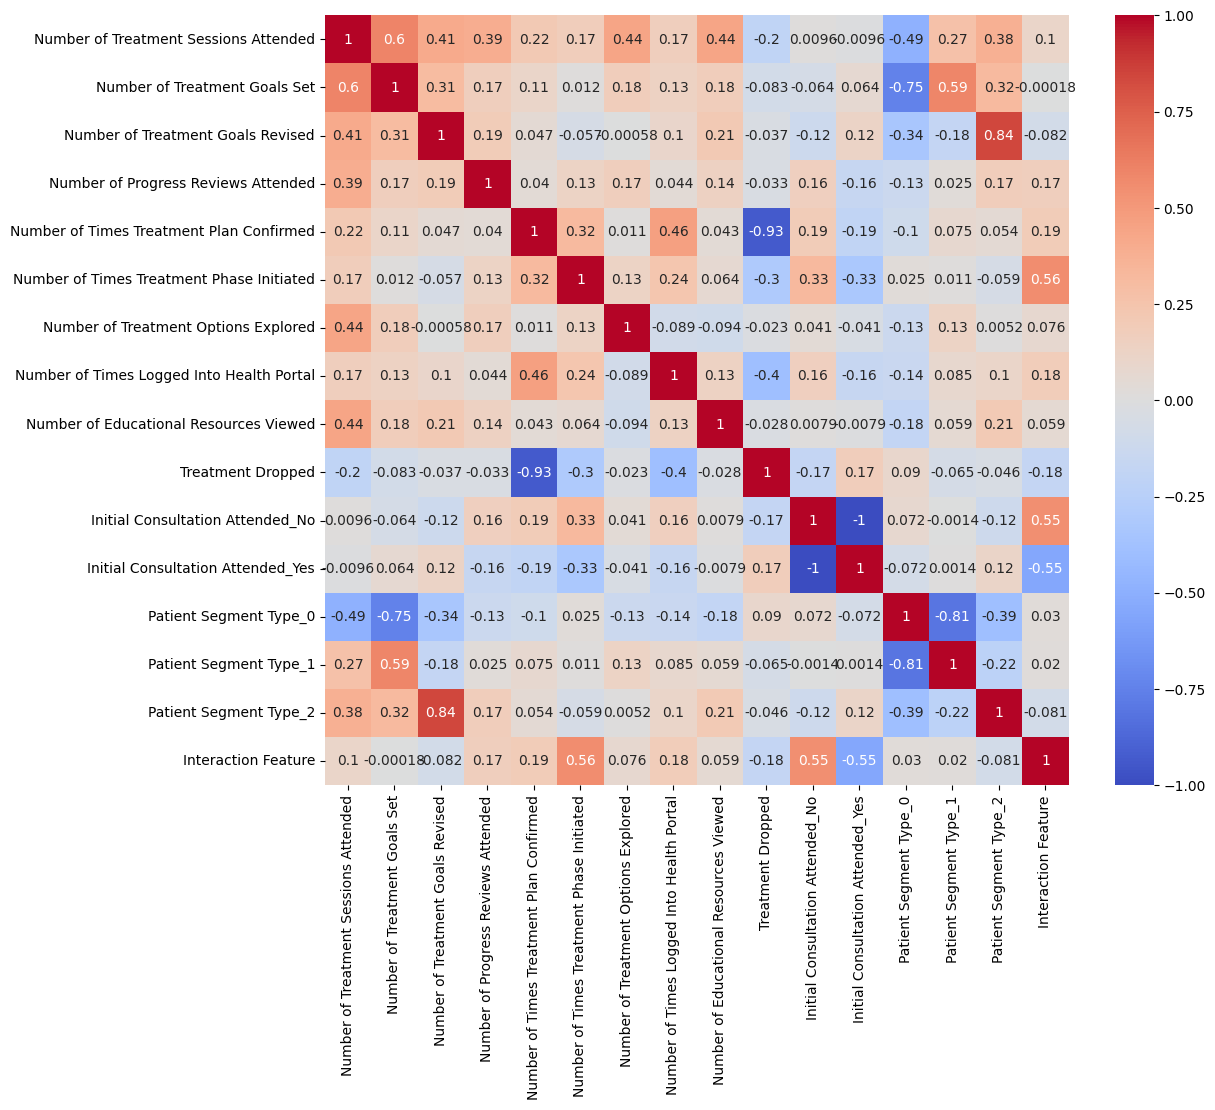

In [235]:
# Correlation matrix
corr = patient_dropout_data_new_feature.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Multicollinearity Handling

## Identify MultiCollinearity From the Previously generated Correlation Matrix

- From the previous Correlation matrix we can see that:
    - Patient Segment Type_2
    - Number of Treatment Goals Revised


## Addressing Multicollinearity

### By Dropping one of the Columns

- We can drop patient segment type 2 to reduce multicollinearity

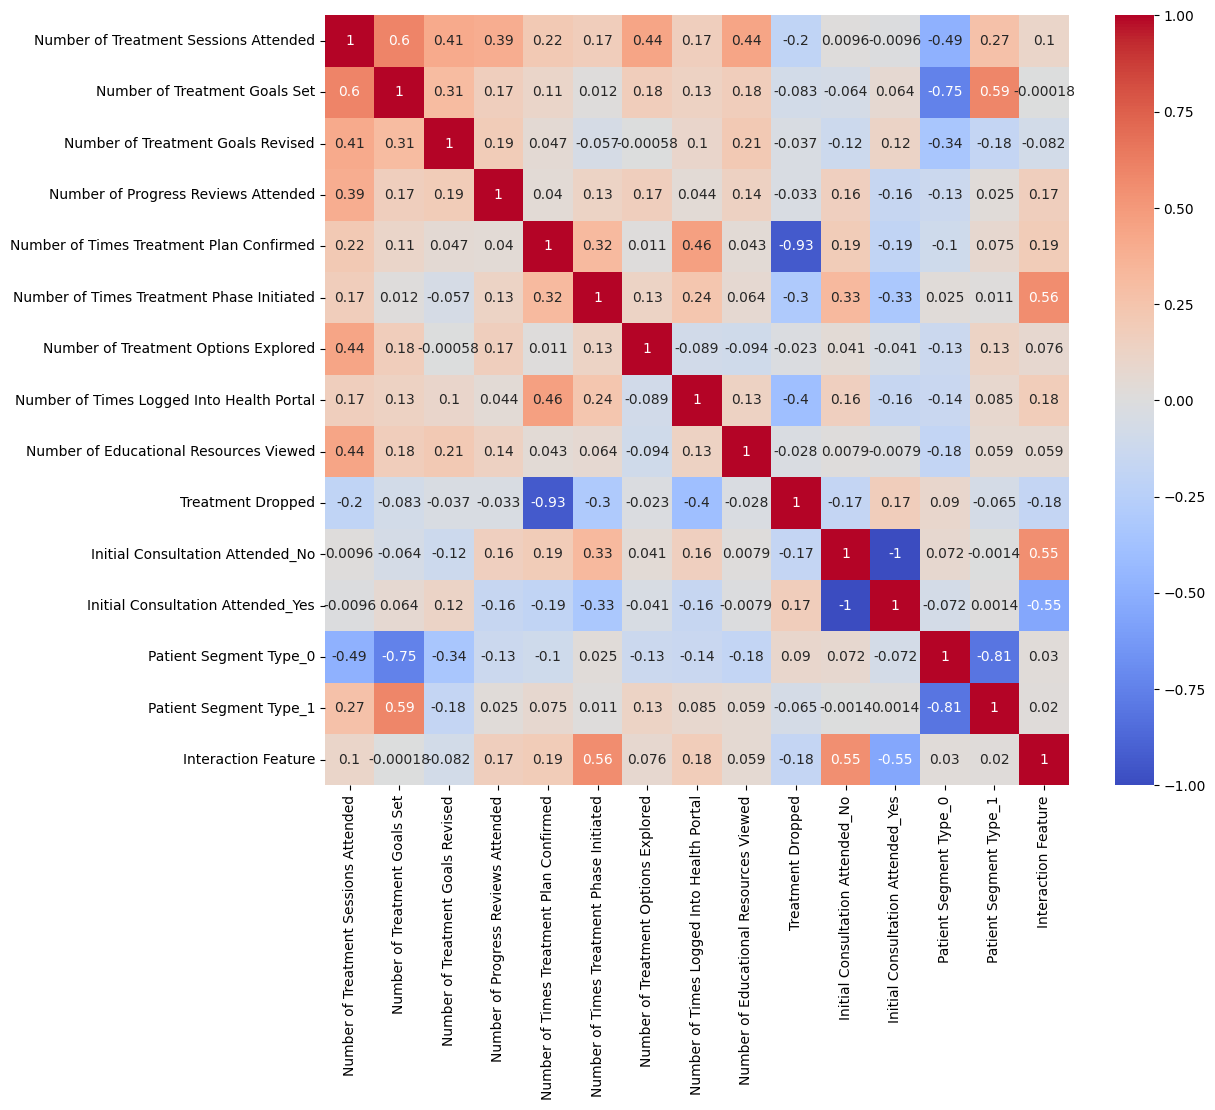

In [236]:
# drop the Patient Segment Type_2 column
patient_addressed_data = patient_dropout_data_new_feature.copy()
patient_addressed_data.drop('Patient Segment Type_2', axis=1, inplace=True)
patient_addressed_data.head()

# correlation matrix
corr = patient_addressed_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# save the cleaned data
patient_addressed_data.to_csv('updated_data.csv', index=False)



### Using PCA

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.463856  0.212464  1.065860 -0.115435  0.428090 -0.068149  0.315106
1 -0.284765 -0.381090 -0.534318  0.505403  0.108492  0.653285 -0.542650
2  0.755765  0.405726  0.276144 -1.603950  0.712606 -0.489917 -1.097117
3 -0.845807  0.561653 -0.117708 -0.032617  0.000163  0.992908 -0.338401
4 -0.173860 -1.109612  0.024533 -0.080304 -0.368992 -1.416741  0.230143


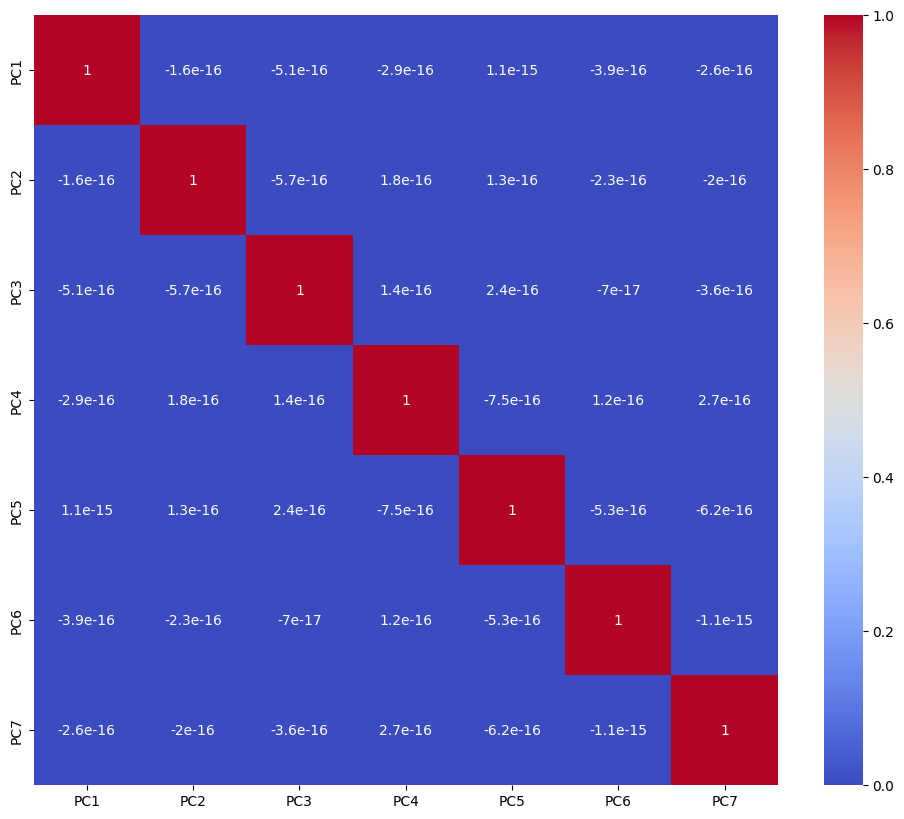

In [237]:
# Addressing multicollinearity using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
patient_dropout_data_pca = patient_dropout_data_new_feature.copy()

# Fit and transform the data
patient_dropout_data_pca = pca.fit_transform(patient_dropout_data_pca)
patient_dropout_data_pca = pd.DataFrame(data=patient_dropout_data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print(patient_dropout_data_pca.head())

# correlation matrix
corr = patient_dropout_data_pca.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Model Building

## Feature Selection

- using recursive feature selection

In [238]:
# feature selection using RFE
from sklearn.feature_selection import RFE

# Split the data into features and target
X = patient_addressed_data.drop('Treatment Dropped', axis=1)
y = patient_addressed_data['Treatment Dropped']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

# Selecting the top 5 features
X_rfe = X[X.columns[rfe.support_]]
X_rfe.head()

[ True  True False False  True False  True  True False False False  True
 False  True]
[1 1 8 3 1 4 1 1 2 5 7 1 6 1]
Index(['Number of Treatment Sessions Attended',
       'Number of Treatment Goals Set', 'Number of Treatment Goals Revised',
       'Number of Progress Reviews Attended',
       'Number of Times Treatment Plan Confirmed',
       'Number of Times Treatment Phase Initiated',
       'Number of Treatment Options Explored',
       'Number of Times Logged Into Health Portal',
       'Number of Educational Resources Viewed',
       'Initial Consultation Attended_No', 'Initial Consultation Attended_Yes',
       'Patient Segment Type_0', 'Patient Segment Type_1',
       'Interaction Feature'],
      dtype='object')


,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Times Treatment Plan Confirmed,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Patient Segment Type_0,Interaction Feature
0,-0.619532,-0.366274,-0.361933,-0.213745,-0.422817,True,-0.860453
1,1.512434,-0.513522,-0.361933,-0.048693,-0.422817,True,-0.000000
2,-0.368712,0.222716,1.567924,-0.213745,-0.422817,False,0.000000
3,-0.494122,-0.513522,-0.361933,0.281412,-0.422817,True,-0.000000
5,-0.055188,0.369963,-0.361933,-0.213745,-0.422817,False,0.018522


## Train Test Split

- We use 80/20 split

In [239]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

## Model Fitting

### With C=100

In [240]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(penalty="l2", C=100, solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        logreg.score(X_test, y_test)
    )
)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.98
[[ 98   2]
 [ 11 664]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775



### With C=1.0

In [241]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(penalty="l2", C=1.0, solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        logreg.score(X_test, y_test)
    )
)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.98
[[ 98   2]
 [ 11 664]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775



### With C=0.001

In [242]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(penalty="l2", C=0.001, solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        logreg.score(X_test, y_test)
    )
)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.94
[[ 67  33]
 [ 12 663]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       100
           1       0.95      0.98      0.97       675

    accuracy                           0.94       775
   macro avg       0.90      0.83      0.86       775
weighted avg       0.94      0.94      0.94       775



- So we are choosing C=1.0 as it provides good accuracy


In [243]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(penalty="l2", C=1.0, solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        logreg.score(X_test, y_test)
    )
)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.98
[[ 98   2]
 [ 11 664]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775



## K-Fold Cross Validation

In [244]:
# Kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(penalty="l2", C=1.0, solver="liblinear")
results = cross_val_score(model, X_rfe, y, cv=kfold)
for i in range(len(results)):
    print("Fold %d: %.2f%%" % (i, results[i] * 100.0))
print("Accuracy: %.2f%%" % (results.mean() * 100.0))

Fold 0: 98.20%
Fold 1: 98.45%
Fold 2: 97.67%
Fold 3: 98.19%
Fold 4: 98.71%
Fold 5: 98.71%
Fold 6: 98.19%
Fold 7: 98.97%
Fold 8: 98.71%
Fold 9: 97.67%
Accuracy: 98.35%


# Model Evaluation

## Accuracy

In [245]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.98


## Precision

In [246]:
# Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

Precision: 1.00


## Recall

In [247]:
# Recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Recall: 0.98


## F1-Score

In [248]:
# F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

F1 Score: 0.99


## Area Under the Receiver Operating Characterisic (ROC-AUC) curve.

ROC-AUC: 0.98


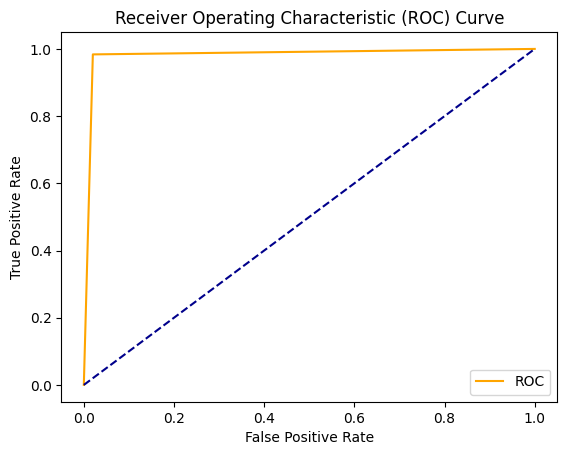

In [249]:
# Area Under the Receiver Operating Characterisic (ROC-AUC) curve.
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: {:.2f}".format(roc_auc))

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")

plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# Discusion and Conclusion

## Discussion
- The initial exploration of the dataset helped identify important features and understand data distributions.
- Data preprocessing, including handling missing values, feature scaling, and encoding, was crucial for model training.
- Addressed MultiCollinearity by identifying culprit columns using correlation matrix and then dropping one of the affected coolumn.
- I created an interaction feature using two columns.
- I trained models with various C values and evaluated them, with C=1.0 showing the best result.
- I used graphs and correlation to better understand features and choose good features.
- I used RFE to choose the top 5 features
- Overall, the combination of preprocessing, feature engineering, and model evaluation was key to improving predictive accuracy.

## Conclusion
- Data exploration and preprocessing are critical steps in building reliable machine learning models.
- Using interaction features and addressing MultiCollinearity helped to enhance model accuracy.
- The best-performing model was able to predict effectively with 0.98 accuracy.
- Future improvements could include tuning model hyperparameters and testing with additional datasets.
- This analysis provided a good foundation for understanding the impact of data preparation on model performance.
